In [5]:
# 分析波士顿房价

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
# 'CRIM'城镇人均犯罪率，'ZN'住宅用地所占比例，'INDUS'城镇中非住宅用地所占比例 
# 'CHAS'虚拟变量, 'NOX'环保指数, 'RM'每栋住宅的房间数, 'AGE'1940以前建成的自住单位比例
# 'DIS'距离5个波士顿就业中心的加权距离, 'RAD'距离高速公路的便利指数, 'TAX'每一万美元的不动产税率
# 'PRTATIO'城镇中教师学生的比例, 'B'城镇中黑人比例, 'LSTAT'城镇中有多少房东输入低收入人群
# 'MEDV'自住房屋房价中位数
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
         'PRTATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filename, names=names, delim_whitespace=True)
data.shape

(506, 14)

In [3]:
# 特征属性的字段类型
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PRTATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [4]:
# 查看前10条记录
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRTATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [7]:
# 描述性统计信息
pd.set_option('precision', 1)
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRTATIO,B,LSTAT,MEDV
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


In [8]:
# 查看数据特征之间两两关联关系
pd.set_option('precision',  2)
data.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRTATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


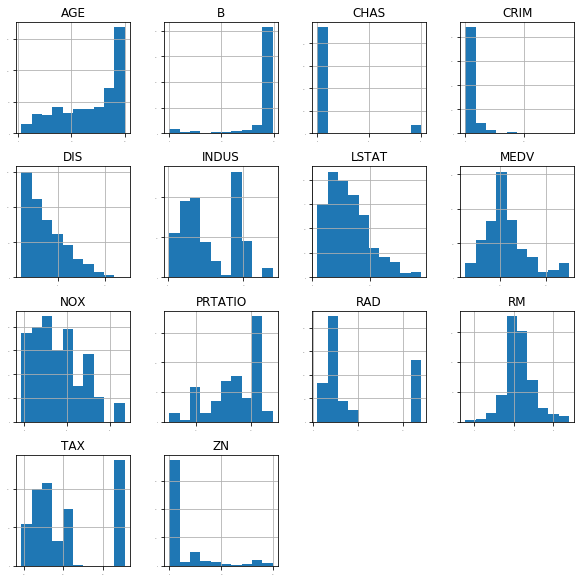

In [10]:
# 数据可视化

# 单一特征图表
# 直方图
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(10,10))
plt.show()

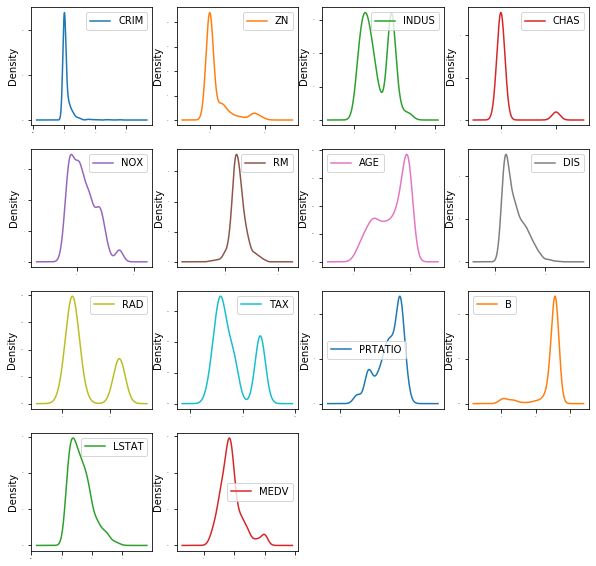

In [12]:
# 密度图
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, fontsize=1, figsize=(10,10))
plt.show()

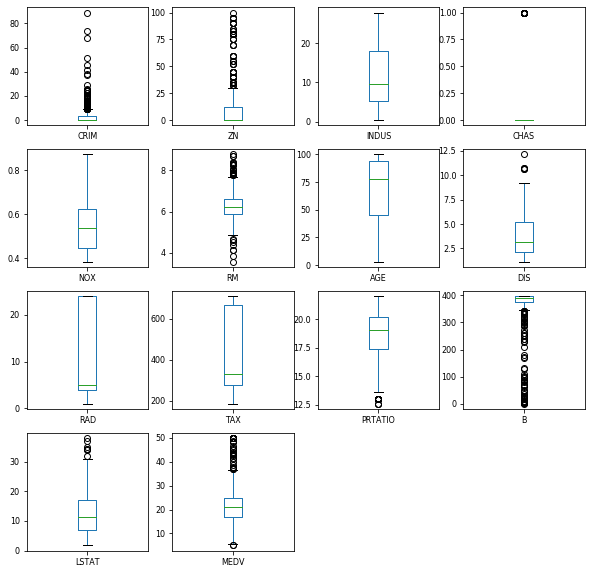

In [14]:
# 箱线图
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8,figsize=(10,10))
plt.show()

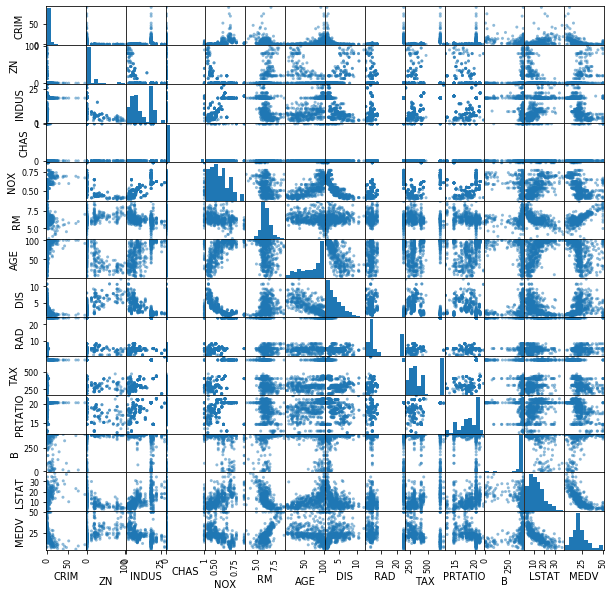

In [17]:
# 多重数据图表

# 散点矩阵图
pd.plotting.scatter_matrix(data, figsize=(10,10))
plt.show()

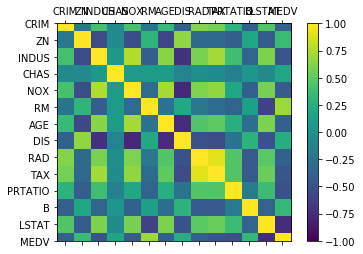

In [24]:
# 相关矩阵图
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0, 14, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [25]:
# 分离数据集
array = data.values
X = array[:, 0:13]
Y = array[:, 13]
validatiomn_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validatiomn_size, random_state=seed)


In [27]:
# 评估算法 -- 评估标准
num_folds = 10
scoring = 'neg_mean_squared_error'

# 评估算法 -- baseline
models = {}
models['LR'] = LinearRegression()
models['LASSO'] = Lasso()
models['EN'] = ElasticNet()
models['KNN'] = KNeighborsRegressor()
models['CART'] = DecisionTreeRegressor()
models['SVM'] = SVR()

# 评估算法
results = []
for key in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(models[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print("%s: %f (%f)" % (key, cv_result.mean(), cv_result.std()))

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -27.833393 (13.664000)
SVM: -85.518342 (31.994798)


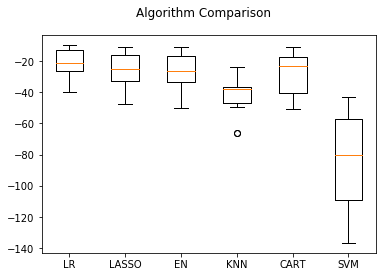

In [28]:
# 评估算法 -- 箱线图
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

In [31]:
# 评估算法 -- 正态化数据
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])
pipelines['ScalerLASSO'] = Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])
pipelines['ScalerEN'] = Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])
pipelines['ScalerKNN'] = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])
pipelines['ScalerCART'] = Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', StandardScaler()), ('SVM', SVR())])

results = []
for key in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(pipelines[key], X_train, Y_train, cv=kfold,scoring=scoring)
    results.append(cv_result)
    print("%s: %f (%f)" % (key, cv_result.mean(), cv_result.std()))

ScalerLR: -21.379856 (9.414264)
ScalerLASSO: -26.607314 (8.978761)
ScalerEN: -27.932372 (10.587490)
ScalerKNN: -20.107620 (12.376949)
ScalerCART: -23.285829 (8.900160)
ScalerSVM: -29.633086 (17.009186)


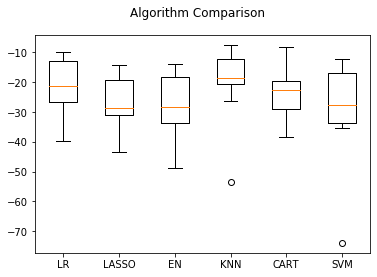

In [32]:
# 评估算法 -- 箱线图
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

In [35]:
# 调参改善算法 -- KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优： %s 使用 %s '% (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'],
                grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print(' %f (%f) with %r' % (mean, std, param))

最优： -18.172136963696367 使用 {'n_neighbors': 3} 
 -20.208663 (15.029652) with {'n_neighbors': 1}
 -18.172137 (12.950570) with {'n_neighbors': 3}
 -20.131163 (12.203697) with {'n_neighbors': 5}
 -20.575845 (12.345886) with {'n_neighbors': 7}
 -20.368264 (11.621738) with {'n_neighbors': 9}
 -21.009204 (11.610012) with {'n_neighbors': 11}
 -21.151809 (11.943318) with {'n_neighbors': 13}
 -21.557400 (11.536339) with {'n_neighbors': 15}
 -22.789938 (11.566861) with {'n_neighbors': 17}
 -23.871873 (11.340389) with {'n_neighbors': 19}
 -24.361362 (11.914786) with {'n_neighbors': 21}


In [36]:
# 集成算法
ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])
ensembles['Scaled-KNN'] = Pipeline([('Scaler', StandardScaler()), ('ABKNN',  AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=3)))])
ensembles['Scaled-LR'] = Pipeline([('Scaler', StandardScaler()), ('ABLR', LinearRegression())])
ensembles['ScaledRFR'] = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestRegressor())])
ensembles['ScaledETR'] = Pipeline([('Scaler', StandardScaler()), ('ETR', ExtraTreesRegressor())])
ensembles['ScaledGBR'] = Pipeline([('Scaler', StandardScaler()), ('RBR', GradientBoostingRegressor())])

results = []
for key in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(ensembles[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print("%s: %f (%f)" % (key, cv_result.mean(), cv_result.std()))

ScaledAB: -15.320884 (6.214522)
Scaled-KNN: -15.834453 (9.934704)
Scaled-LR: -21.379856 (9.414264)
ScaledRFR: -11.686390 (5.852549)
ScaledETR: -10.962657 (6.646741)
ScaledGBR: -9.981623 (4.406363)


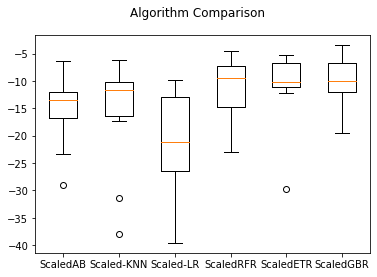

In [37]:
# 集成算法 -- 箱线图
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(ensembles.keys())
plt.show()

In [39]:
# 集成算法调参 

# 集成算法 GBM -- 调参
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators':[10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900]}
model = GradientBoostingRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)
print('最优： %s 使用 %s '% (grid_result.best_score_, grid_result.best_params_))


最优： -9.07999427998017 使用 {'n_estimators': 800} 


In [40]:
# 集成算法 ET -- 调参
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators':[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
model = ExtraTreesRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)
print('最优： %s 使用 %s '% (grid_result.best_score_, grid_result.best_params_))

最优： -8.983940543544145 使用 {'n_estimators': 70} 


In [73]:
# 确定最终模型（ET）

# 训练模型
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
gbr = ExtraTreesRegressor(n_estimators=70)
gbr.fit(X=rescaledX, y=Y_train)

# 评估算法模型
rescaledX_validation = scaler.transform(X_validation)
predictions = gbr.predict(rescaledX_validation)
print(mean_squared_error(Y_validation, predictions))

11.751861604641851
